In [1]:
# Download das imagens a serem utilizadas

!wget https://people.math.sc.edu/Burkardt/data/tif/cameraman.tif
!wget http://www.inf.ufrgs.br/~oliveira/Chateau_small.jpg

--2021-02-27 02:37:41--  https://people.math.sc.edu/Burkardt/data/tif/cameraman.tif
Resolving people.math.sc.edu (people.math.sc.edu)... 129.252.1.14
Connecting to people.math.sc.edu (people.math.sc.edu)|129.252.1.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65240 (64K) [image/tiff]
Saving to: ‘cameraman.tif’

cameraman.tif       100%[===================>]  63.71K   308KB/s    in 0.2s    

2021-02-27 02:37:41 (308 KB/s) - ‘cameraman.tif’ saved [65240/65240]

--2021-02-27 02:37:41--  http://www.inf.ufrgs.br/~oliveira/Chateau_small.jpg
Resolving www.inf.ufrgs.br (www.inf.ufrgs.br)... 143.54.11.34
Connecting to www.inf.ufrgs.br (www.inf.ufrgs.br)|143.54.11.34|:80... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://www.inf.ufrgs.br/~oliveira/Chateau_small.jpg [following]
--2021-02-27 02:37:43--  https://www.inf.ufrgs.br/~oliveira/Chateau_small.jpg
Connecting to www.inf.ufrgs.br (www.inf.ufrgs.br)|143.54.11.34|:443..

In [2]:
import imageio

img_cman = imageio.imread("cameraman.tif")
img_chateau = imageio.imread("Chateau_small.jpg")

In [4]:
img_cman.shape

(256, 256)

In [5]:
img_chateau.shape

(300, 400, 3)

In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

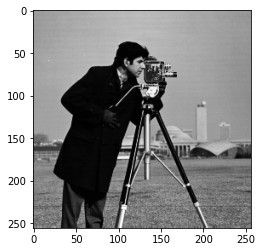

In [13]:
# Laboratório 01 - Atividade 01

imgplot = plt.imshow(img_cman, cmap="gray")
plt.show()

Text(0.5, 0, 'Negativo')

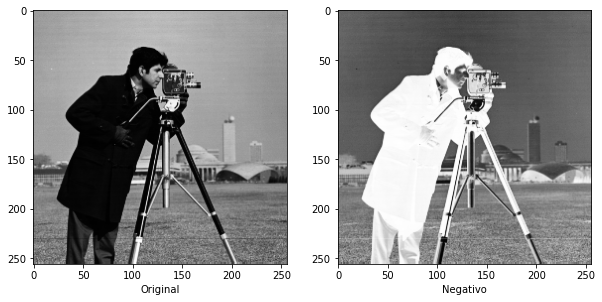

In [97]:
# Laboratório 01 - Atividade 02

img_cman_neg = 255 - img_cman

figure = plt.figure(figsize=(10,10))

figure01 = figure.add_subplot(1,2,1)
plt.imshow(img_cman, cmap="gray")
figure01.set_xlabel("Original")

figure02 = figure.add_subplot(1,2,2)
plt.imshow(img_cman_neg, cmap="gray")
figure02.set_xlabel("Negativo")

Text(0.5, 0, 'Negativo')

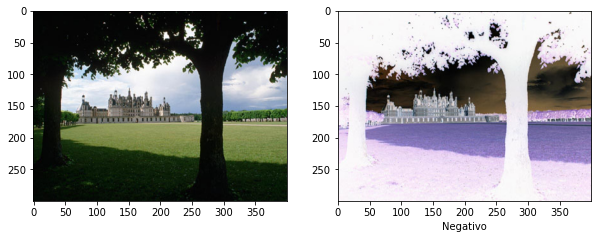

In [99]:
# Laboratório 01 - Atividade 03

img_chateau_neg = 255 - img_chateau

figure = plt.figure(figsize=(10,10))

figure01 = figure.add_subplot(1,2,1)
plt.imshow(img_chateau)
figure02.set_xlabel("Original")

figure02 = figure.add_subplot(1,2,2)
plt.imshow(img_chateau_neg)
figure02.set_xlabel("Negativo")

In [30]:
# Extra: Função para criar um kernel gaussiano de tamanho variável, conforme mostrado em aula.

def Kernel_Gaussiano(l = 5, sig = 1.):
  ax = np.linspace(-(l - 1)/2., (l - 1)/2., l)
  xx, yy = np.meshgrid(ax, ax)

  kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))

  return kernel / np.sum(kernel)

In [5]:
from scipy import ndimage

Text(0.5, 0, 'Borramento Gaussiano 3x3, \nsigma = 1')

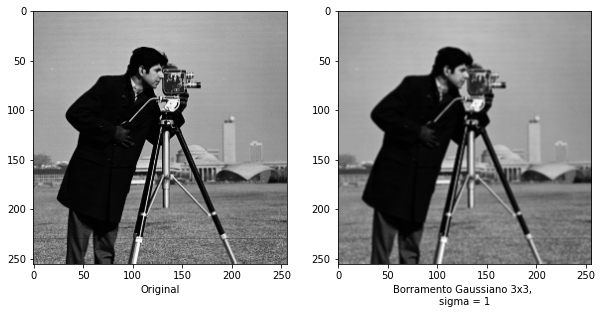

In [100]:
# Laboratório 01 - Atividade 04

# a) Aplicando filtro Gaussiano
gaussiankernel = np.array([[0.0625, 0.125, 0.0625],
                          [0.125, 0.25, 0.125],
                          [0.0625, 0.125, 0.0625]])

img_blur_3x3 = ndimage.convolve(img_cman, gaussiankernel)

figure = plt.figure(figsize=(10,10))

figure01 = figure.add_subplot(1,2,1)
plt.imshow(img_cman, cmap="gray")
figure01.set_xlabel("Original")

figure02 = figure.add_subplot(1,2,2)
plt.imshow(img_blur_3x3, cmap="gray")
figure02.set_xlabel("Borramento Gaussiano 3x3, \nsigma = 1")


Text(0.5, 0, '3x Filtro Gaussiano 3x3,\nsigma = 1')

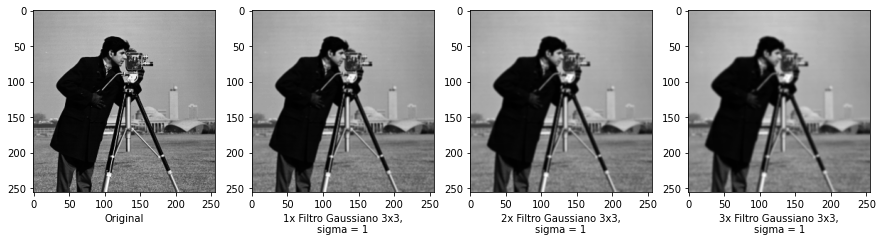

In [105]:
# Laboratório 01 - Atividade 04

# b) Reaplicando filtro Gaussiano

img_blur_01 = ndimage.convolve(img_cman, gaussiankernel)
img_blur_02 = ndimage.convolve(img_blur_01, gaussiankernel)
img_blur_03 = ndimage.convolve(img_blur_02, gaussiankernel)

figure = plt.figure(figsize=(15,15))

figure01 = figure.add_subplot(1,4,1)
plt.imshow(img_cman, cmap="gray")
figure01.set_xlabel("Original")

figure02 = figure.add_subplot(1,4,2)
plt.imshow(img_blur_01, cmap="gray")
figure02.set_xlabel("1x Filtro Gaussiano 3x3,\nsigma = 1")

figure03 = figure.add_subplot(1,4,3)
plt.imshow(img_blur_02, cmap="gray")
figure03.set_xlabel("2x Filtro Gaussiano 3x3,\nsigma = 1")

figure04 = figure.add_subplot(1,4,4)
plt.imshow(img_blur_03, cmap="gray")
figure04.set_xlabel("3x Filtro Gaussiano 3x3,\nsigma = 1")

Text(0.5, 0, 'Filtro Laplaciano P')

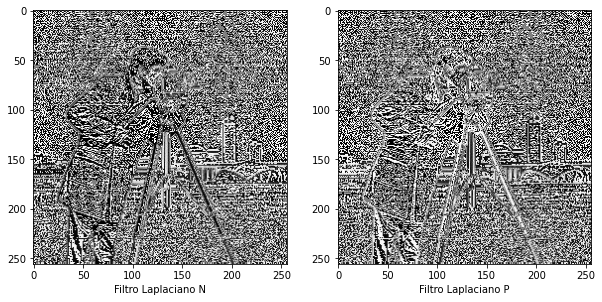

In [108]:
# Laboratório 01 - Atividade 04

# c) Aplicando filtro Laplaciano

laplaciankernel_n = np.array([[0, 1, 0],
                              [1, -4, 1],
                              [0, 1, 0]])

laplaciankernel_p = np.array([[0, -1, 0],
                              [-1, 4, -1],
                              [0, -1, 0]])

img_ln = ndimage.convolve(img_cman, laplaciankernel_n)
img_lp = ndimage.convolve(img_cman, laplaciankernel_p)

figure = plt.figure(figsize=(10,10))

figure01 = figure.add_subplot(1,2,1)
plt.imshow(img_ln, cmap="gray")
figure01.set_xlabel("Filtro Laplaciano N")

figure02 = figure.add_subplot(1,2,2)
plt.imshow(img_lp, cmap="gray")
figure02.set_xlabel("Filtro Laplaciano P")

Text(0.5, 0, 'Filtro High Boost')

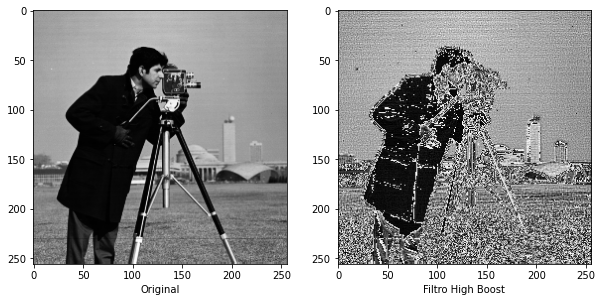

In [109]:
# Laboratório 01 - Atividade 04

# d) Aplicando filtro High Boost

highboost = np.array([[-1, -1, -1],
                      [-1, 9, -1],
                      [-1, -1, -1]])

img_hb = ndimage.convolve(img_cman, highboost)

figure = plt.figure(figsize=(10,10))

figure01 = figure.add_subplot(1,2,1)
plt.imshow(img_cman, cmap="gray")
figure01.set_xlabel("Original")

figure01 = figure.add_subplot(1,2,2)
plt.imshow(img_hb, cmap="gray")
figure01.set_xlabel("Filtro High Boost")


Text(0.5, 0, 'Filtro Prewitt Horizontal + 127')

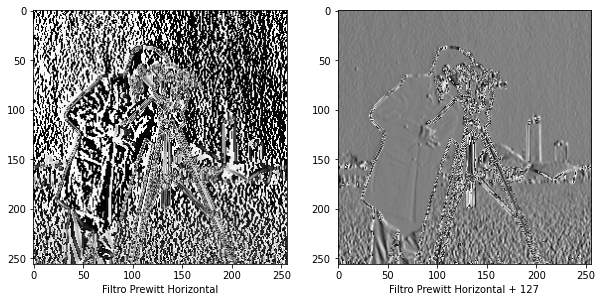

In [11]:
# Laboratório 01 - Atividade 04

# e) Aplicando filtro Prewitt Horizontal

prewitt_h = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

img_ph = ndimage.convolve(img_cman, prewitt_h)

figure = plt.figure(figsize=(10,10))

figure01 = figure.add_subplot(1,2,1)
plt.imshow(img_ph, cmap="gray")
figure01.set_xlabel("Filtro Prewitt Horizontal")

figure02 = figure.add_subplot(1,2,2)
plt.imshow(img_ph + 127, cmap="gray")
figure02.set_xlabel("Filtro Prewitt Horizontal + 127")

Text(0.5, 0, 'Filtro Prewitt Horizontal + 127\nInvertido')

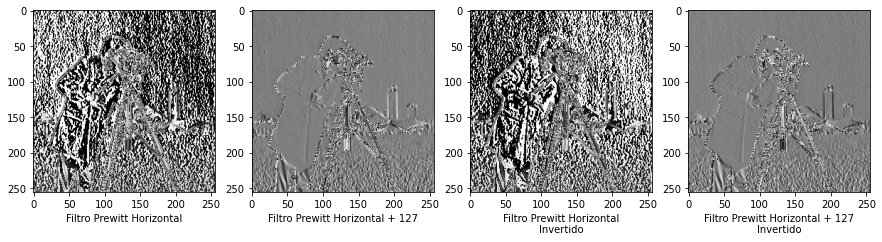

In [12]:
# Laboratório 01 - Atividade 04

# f) Aplicando filtro Prewitt Horizontal Invertido

figure = plt.figure(figsize=(15,15))

figure01 = figure.add_subplot(1,4,1)
plt.imshow(img_ph, cmap="gray")
figure01.set_xlabel("Filtro Prewitt Horizontal")

figure02 = figure.add_subplot(1,4,2)
plt.imshow(img_ph + 127, cmap="gray")
figure02.set_xlabel("Filtro Prewitt Horizontal + 127")

prewitt_h_inv = (-1) * prewitt_h

img_ph_inv = ndimage.convolve(img_cman, prewitt_h_inv)

figure03 = figure.add_subplot(1,4,3)
plt.imshow(img_ph_inv, cmap="gray")
figure03.set_xlabel("Filtro Prewitt Horizontal\nInvertido")

figure03 = figure.add_subplot(1,4,4)
plt.imshow(img_ph_inv + 127, cmap="gray")
figure03.set_xlabel("Filtro Prewitt Horizontal + 127\nInvertido")


Text(0.5, 0, 'Filtro Prewitt Vertical + 127\nInvertido')

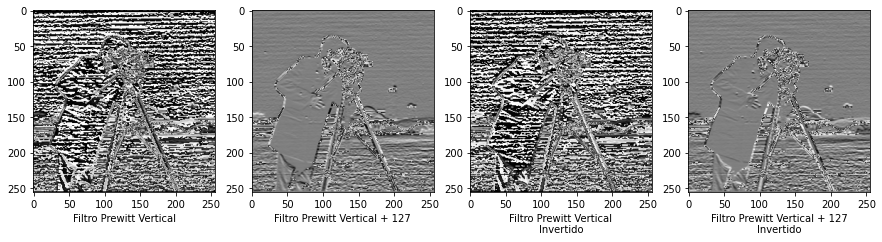

In [14]:
# Laboratório 01 - Atividade 04

# g) Aplicando filtro Prewitt Vertical

prewitt_v = np.array([[-1, -1, -1],
                      [0, 0, 0],
                      [1, 1, 1]])

img_pv = ndimage.convolve(img_cman, prewitt_v)

figure = plt.figure(figsize=(15,15))

figure_s = figure.add_subplot(1,4,1)
plt.imshow(img_pv, cmap="gray")
figure_s.set_xlabel("Filtro Prewitt Vertical")

figure_s = figure.add_subplot(1,4,2)
plt.imshow(img_pv + 127, cmap="gray")
figure_s.set_xlabel("Filtro Prewitt Vertical + 127")

prewitt_v_inv = (-1) * prewitt_v

img_pv_inv = ndimage.convolve(img_cman, prewitt_v_inv)

figure_s = figure.add_subplot(1,4,3)
plt.imshow(img_pv_inv, cmap="gray")
figure_s.set_xlabel("Filtro Prewitt Vertical\nInvertido")

figure_s = figure.add_subplot(1,4,4)
plt.imshow(img_pv_inv + 127, cmap="gray")
figure_s.set_xlabel("Filtro Prewitt Vertical + 127\nInvertido")

In [ ]:
# Laboratório 01 - Atividade 05

mag_grad = np.array([[]])
iph = np.array(img_ph)
ipv = np.array(img_pv)

for i in img_ph:
  for j in img_pv:
    mag_grad[i][j] = sqrt()